In [2]:
import numpy as np
import pandas as pd
import operator
import pickle
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, cross_validation
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='once')

In [4]:
subject_details = pd.read_pickle('../../../Data/Opioids/Model_Data/subject_details_age.pickle')
subject_details.drop(["AGE"], axis=1, inplace=True)
subject_details.head()

,SUBJECT_ID,GENDER,EXPIRE_FLAG,TOTAL_NARCOTIC_PRESCRIPTONS,TOTAL_ANTI_NARCOTIC_PRESCRIPTONS,NARCOTIC,ANTI-NARCOTIC,ICU_STAY,OXYMORPHONE,OXYCODONE,...,MEPERIDINE,HYDROMORPHONE,HYDROCODONE,FENTANYL,CODEINE,BUPRENORPHINE,METHADONE,NALOXONE,SIDE_EFFECTS_FLAG,AGE_GROUP
0,249,0,0,8.0,0.0,1,0,1,0.0,4.0,...,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,250,0,1,6.0,0.0,1,0,1,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,3
2,252,1,0,4.0,0.0,1,0,1,0.0,0.0,...,2.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,5
3,255,1,0,2.0,0.0,1,0,0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,256,1,0,22.0,0.0,1,0,1,0.0,31.0,...,0.0,5.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,7


In [5]:
x = subject_details.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
subject_details_normalized = pd.DataFrame(x_scaled)
subject_details_normalized.columns=subject_details.columns
subject_details_normalized.drop(["SUBJECT_ID","AGE_GROUP"], axis=1, inplace=True)
subject_details_normalized["AGE_GROUP"] = subject_details["AGE_GROUP"].values
subject_details_normalized["SUBJECT_ID"] = subject_details["SUBJECT_ID"].values
subject_details_normalized.head()

,GENDER,EXPIRE_FLAG,TOTAL_NARCOTIC_PRESCRIPTONS,TOTAL_ANTI_NARCOTIC_PRESCRIPTONS,NARCOTIC,ANTI-NARCOTIC,ICU_STAY,OXYMORPHONE,OXYCODONE,MORPHINE,...,HYDROMORPHONE,HYDROCODONE,FENTANYL,CODEINE,BUPRENORPHINE,METHADONE,NALOXONE,SIDE_EFFECTS_FLAG,AGE_GROUP,SUBJECT_ID
0,0.0,0.0,0.020305,0.0,1.0,0.0,1.0,0.0,0.010499,0.037694,...,0.013857,0.0,0.000000,0.0,0.0,0.090024,0.0,0.0,7,249
1,0.0,1.0,0.015228,0.0,1.0,0.0,1.0,0.0,0.000000,0.004435,...,0.000000,0.0,0.006754,0.0,0.0,0.090024,0.0,0.0,3,250
2,1.0,0.0,0.010152,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.006303,0.0,0.0,0.090024,0.0,0.0,5,252
3,1.0,0.0,0.005076,0.0,1.0,0.0,0.0,0.0,0.010499,0.008869,...,0.000000,0.0,0.000000,0.0,0.0,0.090024,0.0,0.0,7,255
4,1.0,0.0,0.055838,0.0,1.0,0.0,1.0,0.0,0.081365,0.008869,...,0.005774,0.0,0.004052,0.0,0.0,0.090024,0.0,0.0,7,256


In [6]:
cols = subject_details_normalized.columns.tolist()
cols = cols[-1:] + cols[:-1]
subject_details_normalized = subject_details_normalized[cols]
subject_details_normalized.head()

,SUBJECT_ID,GENDER,EXPIRE_FLAG,TOTAL_NARCOTIC_PRESCRIPTONS,TOTAL_ANTI_NARCOTIC_PRESCRIPTONS,NARCOTIC,ANTI-NARCOTIC,ICU_STAY,OXYMORPHONE,OXYCODONE,...,MEPERIDINE,HYDROMORPHONE,HYDROCODONE,FENTANYL,CODEINE,BUPRENORPHINE,METHADONE,NALOXONE,SIDE_EFFECTS_FLAG,AGE_GROUP
0,249,0.0,0.0,0.020305,0.0,1.0,0.0,1.0,0.0,0.010499,...,0.000000,0.013857,0.0,0.000000,0.0,0.0,0.090024,0.0,0.0,7
1,250,0.0,1.0,0.015228,0.0,1.0,0.0,1.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.006754,0.0,0.0,0.090024,0.0,0.0,3
2,252,1.0,0.0,0.010152,0.0,1.0,0.0,1.0,0.0,0.000000,...,0.015625,0.000000,0.0,0.006303,0.0,0.0,0.090024,0.0,0.0,5
3,255,1.0,0.0,0.005076,0.0,1.0,0.0,0.0,0.0,0.010499,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.090024,0.0,0.0,7
4,256,1.0,0.0,0.055838,0.0,1.0,0.0,1.0,0.0,0.081365,...,0.000000,0.005774,0.0,0.004052,0.0,0.0,0.090024,0.0,0.0,7


In [8]:
len(subject_details_normalized[subject_details_normalized['EXPIRE_FLAG'] == 1])

12078

In [9]:
len(subject_details_normalized)

29992

In [10]:
subject_details_normalized["AGE_GROUP"] = subject_details_normalized["AGE_GROUP"].astype('category', categories=[1,2,3,4,5,6,7,8])
age_group_df = pd.get_dummies(subject_details_normalized["AGE_GROUP"])
age_group_df.columns=["AGE_1", "AGE_2", "AGE_3", "AGE_4", "AGE_5", "AGE_6", "AGE_7", "AGE_8"]
subject_details_normalized = pd.merge(subject_details_normalized, age_group_df, left_index=True, how='left', right_index=True)
subject_details_normalized.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


,SUBJECT_ID,GENDER,EXPIRE_FLAG,TOTAL_NARCOTIC_PRESCRIPTONS,TOTAL_ANTI_NARCOTIC_PRESCRIPTONS,NARCOTIC,ANTI-NARCOTIC,ICU_STAY,OXYMORPHONE,OXYCODONE,...,SIDE_EFFECTS_FLAG,AGE_GROUP,AGE_1,AGE_2,AGE_3,AGE_4,AGE_5,AGE_6,AGE_7,AGE_8
0,249,0.0,0.0,0.020305,0.0,1.0,0.0,1.0,0.0,0.010499,...,0.0,7,0,0,0,0,0,0,1,0
1,250,0.0,1.0,0.015228,0.0,1.0,0.0,1.0,0.0,0.000000,...,0.0,3,0,0,1,0,0,0,0,0
2,252,1.0,0.0,0.010152,0.0,1.0,0.0,1.0,0.0,0.000000,...,0.0,5,0,0,0,0,1,0,0,0
3,255,1.0,0.0,0.005076,0.0,1.0,0.0,0.0,0.0,0.010499,...,0.0,7,0,0,0,0,0,0,1,0
4,256,1.0,0.0,0.055838,0.0,1.0,0.0,1.0,0.0,0.081365,...,0.0,7,0,0,0,0,0,0,1,0


In [12]:
subjects_with_side_effects = pd.read_pickle('../../../Data/Opioids/Model_Data/Age_Condensed/subjects_with_side_effects.pickle')
subjects_without_side_effects = pd.read_pickle('../../../Data/Opioids/Model_Data/Age_Condensed/subjects_without_side_effects.pickle')
data = pd.read_pickle('../../../Data/Opioids/Model_Data/Age_Condensed/data.pickle')

In [30]:
data = data.sample(frac=1).reset_index(drop=True)
#len(data)
X = data[['GENDER', 'EXPIRE_FLAG', 'TOTAL_NARCOTIC_PRESCRIPTONS',
       'TOTAL_ANTI_NARCOTIC_PRESCRIPTONS', 'NARCOTIC', 'ANTI-NARCOTIC',
       'ICU_STAY', 'OXYMORPHONE', 'OXYCODONE', 'MORPHINE', 'MEPERIDINE',
       'HYDROMORPHONE', 'HYDROCODONE', 'FENTANYL', 'CODEINE', 'BUPRENORPHINE',
       'METHADONE', 'NALOXONE', 'AGE_1', 'AGE_2', 'AGE_3', 'AGE_4', 'AGE_5', 'AGE_6', 'AGE_7', 'AGE_8']]
y = data[['SIDE_EFFECTS_FLAG']]
y = y.as_matrix()
y = y.reshape(20703,)

In [31]:
X = X.drop(['EXPIRE_FLAG'], axis=1)
X

,GENDER,TOTAL_NARCOTIC_PRESCRIPTONS,TOTAL_ANTI_NARCOTIC_PRESCRIPTONS,NARCOTIC,ANTI-NARCOTIC,ICU_STAY,OXYMORPHONE,OXYCODONE,MORPHINE,MEPERIDINE,...,METHADONE,NALOXONE,AGE_1,AGE_2,AGE_3,AGE_4,AGE_5,AGE_6,AGE_7,AGE_8
0,1.0,0.065990,0.000000,1.0,0.0,1.0,0.0,0.115486,0.004435,0.000000,...,0.090024,0.0,0,0,0,1,0,0,0,0
1,0.0,0.012690,0.000000,1.0,0.0,1.0,0.0,0.034121,0.002217,0.000000,...,0.090024,0.0,0,0,0,0,1,0,0,0
2,0.0,0.005076,0.000000,1.0,0.0,1.0,0.0,0.002625,0.000000,0.000000,...,0.090024,0.0,0,0,0,0,0,1,0,0
3,0.0,0.017766,0.000000,1.0,0.0,1.0,0.0,0.036745,0.000000,0.000000,...,0.090024,0.0,0,0,0,0,0,1,0,0
4,1.0,0.010152,0.000000,1.0,0.0,1.0,0.0,0.002625,0.019956,0.000000,...,0.090024,0.0,0,0,1,0,0,0,0,0
5,0.0,0.045685,0.000000,1.0,0.0,1.0,0.0,0.002625,0.002217,0.000000,...,0.090024,0.0,0,0,0,1,0,0,0,0
6,0.0,0.007614,0.000000,1.0,0.0,1.0,0.0,0.005249,0.015521,0.000000,...,0.090024,0.0,0,0,0,0,0,1,0,0
7,1.0,0.012690,0.000000,1.0,0.0,1.0,0.0,0.089239,0.026608,0.093750,...,0.090024,0.0,0,0,0,0,0,1,0,0
8,1.0,0.012690,0.000000,1.0,0.0,1.0,0.0,0.013123,0.011086,0.007812,...,0.090024,0.0,0,0,1,0,0,0,0,0
9,0.0,0.038071,0.000000,1.0,0.0,1.0,0.0,0.005249,0.000000,0.000000,...,0.090024,0.0,0,0,0,0,1,0,0,0


In [ ]:
pca = PCA()
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply the random over-sampling
#ros = RandomOverSampler(ratio='minority')
#X_resampled, y_resampled = ros.fit_sample(X, y)
sampler = SMOTE()
X_resampled, y_resampled = sampler.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res_vis, y_resampled, test_size=0.2, random_state=42)

# The above returns numpy arrays. Converting them to data frames:
X_train = pd.DataFrame(X_train)   
X_test = pd.DataFrame(X_test)   
Y_train = pd.Series(Y_train)    
Y_test = pd.Series(Y_test)

In [58]:
warnings.filterwarnings('ignore')
predicted = cross_validation.cross_val_predict(LogisticRegression(), X_res_vis, y_resampled, cv=10)
print("Accuracy Score: %f" %(metrics.accuracy_score(y_resampled, predicted)))
print(metrics.classification_report(y_resampled, predicted))

Accuracy Score: 0.772122
             precision    recall  f1-score   support

        0.0       0.77      0.78      0.77     19969
        1.0       0.78      0.76      0.77     19969

avg / total       0.77      0.77      0.77     39938



In [59]:
validation_range = int(0.8*len(X_train))
X_val = X_train.iloc[range(validation_range, len(X_train))]
Y_val = Y_train.iloc[range(validation_range, len(Y_train))]
len(Y_val)

6390

In [60]:
X_train = X_train.iloc[range(0, validation_range)]
Y_train = Y_train.iloc[range(0, validation_range)]
len(X_train)

25560

In [61]:
model = XGBClassifier()

param_grid = {"max_depth": [3, 5, 8, 10], 
             "learning_rate": [0.03, 0.1], 
             "n_estimators": [50, 100, 150, 200], 
             "objective": ['binary:logistic']}

clf = GridSearchCV(model, param_grid=param_grid)

In [62]:
warnings.filterwarnings('ignore')
clf.fit(X_val, Y_val)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 8, 10], 'learning_rate': [0.03, 0.1], 'n_estimators': [50, 100, 150, 200], 'objective': ['binary:logistic']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [63]:
clf.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 200,
 'objective': 'binary:logistic'}

In [43]:
model = XGBClassifier(learning_rate = 0.1, max_depth = 10, n_estimators = 200, objective = 'binary:logistic')
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [44]:
y_pred = model.predict(X_test)
print(model.score(X_test, Y_test))

0.9410365548322484


In [45]:
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.96      0.92      0.94      3984
        1.0       0.93      0.96      0.94      4004

avg / total       0.94      0.94      0.94      7988



In [49]:
predictors_dict = zip(indices, predictors)
print(predictors_dict)

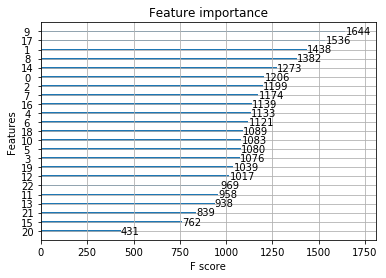

['AGE_7', 'AGE_6', 'AGE_3', 'BUPRENORPHINE', 'AGE_4', 'FENTANYL', 'HYDROMORPHONE', 'AGE_5', 'HYDROCODONE', 'AGE_2', 'TOTAL_ANTI_NARCOTIC_PRESCRIPTONS', 'ANTI-NARCOTIC', 'MEPERIDINE', 'AGE_1', 'ICU_STAY', 'NARCOTIC', 'METHADONE', 'OXYMORPHONE', 'TOTAL_NARCOTIC_PRESCRIPTONS', 'GENDER', 'CODEINE', 'OXYCODONE', 'EXPIRE_FLAG', 'NALOXONE', 'MORPHINE']


In [48]:
importances = model.feature_importances_
indices = np.argsort(importances)[::]
predictors = ['GENDER', 'EXPIRE_FLAG', 'TOTAL_NARCOTIC_PRESCRIPTONS',
       'TOTAL_ANTI_NARCOTIC_PRESCRIPTONS', 'NARCOTIC', 'ANTI-NARCOTIC',
       'ICU_STAY', 'OXYMORPHONE', 'OXYCODONE', 'MORPHINE', 'MEPERIDINE',
       'HYDROMORPHONE', 'HYDROCODONE', 'FENTANYL', 'CODEINE', 'BUPRENORPHINE',
       'METHADONE', 'NALOXONE', 'AGE_1', 'AGE_2', 'AGE_3', 'AGE_4', 'AGE_5', 'AGE_6', 'AGE_7', 'AGE_8']
predictors_sorted = [predictors[f] for f in indices]

xgboost.plot_importance(model)
plt.show()

print(predictors_sorted)

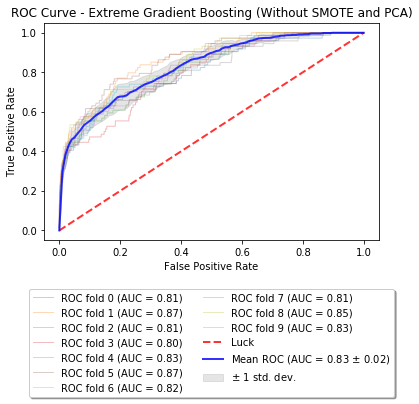

In [52]:
X_cv = X.as_matrix()
cv = StratifiedKFold(n_splits=10)
classifier = XGBClassifier(learning_rate = 0.1, max_depth = 10, n_estimators = 200, objective = 'binary:logistic')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    #X_train = X_train.iloc[train]
    #Y_train = Y_train.iloc[test]
    #X_test = X_train.iloc[test]
    #Y_test = y_resampled
    probas_ = classifier.fit(X_cv[train], y[train]).predict_proba(X_cv[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = metrics.roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
#fig = plt.figure()
#ax = plt.subplot(1)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Extreme Gradient Boosting (Without SMOTE and PCA)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),  shadow=True, ncol=2)
plt.show()

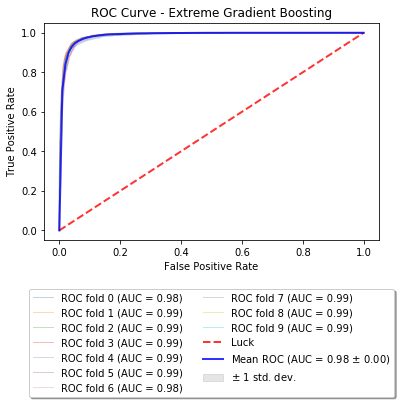

In [53]:
cv = StratifiedKFold(n_splits=10)
classifier = XGBClassifier(learning_rate = 0.1, max_depth = 10, n_estimators = 200, objective = 'binary:logistic')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X_res_vis, y_resampled):
    #X_train = X_train.iloc[train]
    #Y_train = Y_train.iloc[test]
    #X_test = X_train.iloc[test]
    #Y_test = y_resampled
    probas_ = classifier.fit(X_res_vis[train], y_resampled[train]).predict_proba(X_res_vis[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_resampled[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Extreme Gradient Boosting')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),  shadow=True, ncol=2)
plt.show()

In [56]:
len(subject_details_normalized[subject_details_normalized['EXPIRE_FLAG'] == 0])

17914

In [65]:
len(subjects_with_side_effects[subjects_with_side_effects['EXPIRE_FLAG'] == 1])

222